# Arrangement

1) Only with experimental (ie real) data \\
2) Only with simulation data \\
3) With all data \\
4) Transfer learning from simulation to experimental models and vice versa \\
5) All possible methods? few-shot learning?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Supervised

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [ ]:
# @title
epochs = 500
batch_size = 128

In [ ]:
import scipy.io
import numpy as np

mat_data = scipy.io.loadmat('/content/drive/MyDrive/IEEE EMBS SMP 2023/datanew.mat') # Martina: Pls add the path of the dataset file here

In [ ]:
mat_data['datanew'][0][0][0]

array([[ 2,  8,  7],
       [ 2, 10,  7],
       [ 2, 20,  7],
       [ 2, 30,  7],
       [ 2, 40,  7],
       [ 2, 50,  7],
       [ 2, 60,  7],
       [ 2, 70,  7],
       [ 3, 10,  7],
       [ 3, 20,  7],
       [ 3, 30,  7],
       [ 3, 40,  7],
       [ 3, 50,  7],
       [ 3, 60,  7],
       [ 3, 70,  7],
       [ 4, 10,  7],
       [ 4, 20,  7],
       [ 4, 30,  7],
       [ 4, 40,  7],
       [ 4, 50,  7],
       [ 4, 60,  7],
       [ 4, 70,  7],
       [ 2, 10,  8],
       [ 2, 20,  8],
       [ 2, 30,  8],
       [ 2, 40,  8],
       [ 2, 50,  8],
       [ 2, 60,  8],
       [ 2, 70,  8],
       [ 3, 10,  8],
       [ 3, 20,  8],
       [ 3, 30,  8],
       [ 3, 40,  8],
       [ 3, 50,  8],
       [ 3, 60,  8],
       [ 3, 70,  8],
       [ 4, 10,  8],
       [ 4, 20,  8],
       [ 4, 30,  8],
       [ 4, 40,  8],
       [ 4, 50,  8],
       [ 4, 60,  8],
       [ 4, 70,  8],
       [ 2, 10,  9],
       [ 2, 20,  9],
       [ 2, 30,  9],
       [ 2, 40,  9],
       [ 2, 5

In [ ]:
# Print the content
print(mat_data['datanew'][0][0][0].shape)

(169, 3)


In [ ]:
for i in range(10):
  print(mat_data['datanew'][0][0][0][i, :])

[2 8 7]
[ 2 10  7]
[ 2 20  7]
[ 2 30  7]
[ 2 40  7]
[ 2 50  7]
[ 2 60  7]
[ 2 70  7]
[ 3 10  7]
[ 3 20  7]


In [ ]:
print(mat_data['datanew'][0][0][1].shape)

(2, 2, 1001, 169)


In [ ]:
for i in range(10):
  print(mat_data['datanew'][0][0][1][:,:, :, i])

[[[-0.86570132+0.38310367j -0.85496521+0.39368257j
   -0.84368217+0.40362477j ...  0.68890667+0.20858736j
    0.68945938+0.20640016j  0.68999785+0.20420378j]
  [-0.08941916-0.19664524j -0.09756447-0.20212676j
   -0.10612392-0.20723958j ...  0.05783085-0.05409621j
    0.05795807-0.05366111j  0.05814043-0.05321635j]]

 [[-0.11723218-0.21020404j -0.12625068-0.21349844j
   -0.13552417-0.21636043j ...  0.0677823 -0.05339449j
    0.06802986-0.05392028j  0.06823816-0.05445299j]
  [-0.95659131+0.17724706j -0.95084208+0.18872538j
   -0.94416237+0.20000231j ... -0.65921265+0.28089011j
   -0.6590097 +0.28165576j -0.65876347+0.2824344j ]]]
[[[-0.92876697+0.12952596j -0.94073367+0.12644033j
   -0.95452535+0.1298309j  ...  0.52643734+0.28387567j
    0.53042942+0.28261378j  0.53452176+0.28033039j]
  [ 0.01849695-0.20674758j  0.02065374-0.2266801j
    0.01357647-0.24516264j ... -0.2463669 -0.18781553j
   -0.24549405-0.18456404j -0.24426453-0.18218859j]]

 [[ 0.02891231-0.25573584j  0.00987105-0.270414

In [ ]:
# # @title
# import pandas as pd
# import numpy as np

# # Load the CSV file into a pandas DataFrame
# df = pd.read_csv('/content/drive/MyDrive/IEEE EMBS SMP Project/Data_Simulation/new_simulations/data.csv')

# # Convert the DataFrame to a NumPy array
# full_array = df.values

In [ ]:
# full_array.shape

In [ ]:
# full_array[0]

In [ ]:
# full_array[:504, :]

In [ ]:
# print(df.apply(np.mean))
# print(df.apply(np.std))
# print(df.apply(np.max))
# print(df.apply(np.min))

In [ ]:
# threshold_value = 13.10305 # 0.666192*3+11.104474

# column_to_analyze = data_vector[:, 3]
# pass_threshold_mask = column_to_analyze > threshold_value
# count_passing_samples = np.count_nonzero(pass_threshold_mask)
# print(f"Number of samples passing the threshold: {count_passing_samples}")

In [ ]:
# # Identify and remove duplicates
# df_no_duplicates = df.drop_duplicates(keep='first')

# # Save the result to a new CSV file if needed
# df_no_duplicates.to_csv('cleaned_file.csv', index=False)

# # Convert the DataFrame to a NumPy array
# full_array_no_duplicates = df_no_duplicates.values
# full_array_no_duplicates.shape

In [ ]:
X = mat_data['datanew'][0][0][1].reshape((2 * 2 * 1001, 169)).T
y = mat_data['datanew'][0][0][0] #.reshape((3, 169)).T

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# sum_array_scaled = scaler.fit_transform(X)

In [ ]:
X.shape

(169, 4004)

In [ ]:
y.shape

(169, 3)

Just testing

In [ ]:
X = np.unique(X, axis=0)
X

array([[-0.98668396+0.15292013j, -0.98272109+0.17032465j,
        -0.97419804+0.18568896j, ..., -0.5715071 +0.13318332j,
        -0.57307142+0.13581447j, -0.57372415+0.13888747j],
       [-0.9849968 +0.14966434j, -0.98222739+0.1668717j ,
        -0.97485989+0.18251653j, ..., -0.55620766+0.13806093j,
        -0.55629551+0.13762562j, -0.55716437+0.13724133j],
       [-0.98252726+0.25978017j, -0.97940505+0.27196094j,
        -0.97560352+0.28380808j, ..., -0.59939891+0.22856458j,
        -0.59770006+0.22868243j, -0.59616703+0.22825265j],
       ...,
       [-0.83965832+0.00436371j, -0.83329397-0.02315836j,
        -0.8396337 -0.04876202j, ..., -0.44136316+0.22152416j,
        -0.43936554+0.22017017j, -0.43848956+0.21860319j],
       [-0.83871245-0.00141003j, -0.83463699-0.02090368j,
        -0.83800453-0.03900377j, ..., -0.42152199+0.20386253j,
        -0.42066926+0.20592488j, -0.41921106+0.20786965j],
       [-0.83694053-0.00367127j, -0.83397377-0.02376966j,
        -0.83856368-0.04206602

In [ ]:
X.shape

(168, 4004)

In [ ]:
X[0,:]

array([-0.968198  +0.2501851j , -0.95635635+0.26174176j,
       -0.94342089+0.26923579j, ..., -0.43986645+0.2250226j ,
       -0.43792567+0.22085951j, -0.43794703+0.21612328j])

In [ ]:
all_complex = np.all(np.iscomplex(X))
all_complex

True

In [ ]:
y

# Real-valued model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.245, random_state=42)

In [ ]:
X_train.shape

(127, 4004)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(full_array[:,:5], full_array[:,5], test_size=0.245, random_state=42)

In [ ]:
X_test[0]

array([-0.95045483+0.29827434j, -0.94611484+0.3087866j ,
       -0.94140643+0.31898522j, ..., -0.61546588+0.27329239j,
       -0.61506802+0.2731314j , -0.61472493+0.27296954j])

In [ ]:
# file_path = 'X_test_withFreq.csv' #withStandardizing

# # Save the NumPy array to a CSV file
# np.savetxt(file_path, X_test, delimiter=',', fmt='%.15f')

In [ ]:
# file_path = 'y_test.csv' #withStandardizing

# # Save the NumPy array to a CSV file
# np.savetxt(file_path, y_test, delimiter=',', fmt='%.15f')

In [ ]:
# @title
# Build the model
model_1 = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(4004,)),
    # Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3)  # Martina: Pls change here as per the number of outputs
])

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr


# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model
model_1.compile(optimizer=adam_optimizer, loss='mean_squared_error')
model_1.summary()

checkpoint_1 = ModelCheckpoint('best_model_1_treating_as_real.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_1, lr_scheduler])

loss_1 = model_1.evaluate(X_test, y_test)
print("Test Loss:", loss_1)

predictions_1 = model_1.predict(X_test)

errors_1 = np.abs(predictions_1 - y_test)

# Load the best model
best_model = tf.keras.models.load_model('best_model_1_treating_as_real.h5')

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE) with Best Model: {test_loss}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2050560   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2126659 (8.11 MB)
Trainable params: 2126659 (8.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500


1/1 [==============================] - ETA: 0s - loss: 715.3400


Epoch 1: val_loss improved from inf to 658.11487, saving model to best_model_1_treating_as_real.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 715.3400 - val_loss: 658.1149 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 655.5114
Epoch 2: val_loss improved from 658.11487 to 553.76453, saving model to best_model_1_treating_as_real.h5
1/1 [==============================] - 0s 252ms/step - loss: 655.5114 - val_loss: 553.7645 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 551.5958
Epoch 3: val_loss improved from 553.76453 to 438.39633, saving model to best_model_1_treating_as_real.h5
1/1 [==============================] - 0s 261ms/step - loss: 551.5958 - val_loss: 438.3963 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 437.3190
Epoch 4: val_loss improved from 438.39633 to 329.92365, saving model to best_model_1_treating_as_real.h5
1/1 [==============================] - 0s 220ms/step - loss: 437.3190 - val_loss: 329.9236 - lr: 0.0010
Epoch 5/500
1/1 [===========================

2/2 [==============================] - 0s 11ms/step


2/2 [==============================] - 0s 14ms/step - loss: 6.3707
Test Loss (MSE) with Best Model: 6.370741844177246


In [ ]:
#0.05585065856575966

In [ ]:
preds = model_1.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [ ]:
for i in range(len(preds)):
  print(preds[i], " ", y_test[i])

[ 3.0545292 50.082233  12.90647  ]   [ 3 50 13]
[ 2.6711228 18.014008   8.156568 ]   [ 3 20  8]
[ 3.1834273 64.82521   11.386971 ]   [ 3 70 12]
[ 3.4290955 10.055168   8.769251 ]   [ 3 10  8]
[ 3.135311 30.03865  12.290965]   [ 4 30 13]
[ 2.790952  9.810348 11.741399]   [ 4 10 14]
[ 2.8508835 39.744324  12.951585 ]   [ 4 40 14]
[ 2.9536612 18.89312    9.174626 ]   [ 3 20  9]
[ 3.3316994 66.66545   10.235998 ]   [ 4 70 11]
[ 2.8741784 39.91478    8.949702 ]   [ 4 40  9]
[3.7829468 9.987406  7.100745 ]   [ 4 10  7]
[ 3.1114898 30.13899   13.266742 ]   [ 3 30 14]
[ 3.0118828 62.783222  12.626582 ]   [ 2 70 13]
[ 3.1851735 30.051321   9.552537 ]   [ 2 30  9]
[ 2.9984326 50.0824    10.451828 ]   [ 2 50 10]
[ 2.6830993  9.982358  12.150462 ]   [ 2 10 11]
[ 3.199751 29.99982   8.53543 ]   [ 2 30  8]
[ 2.8600533 39.935562  12.015869 ]   [ 2 40 12]
[ 2.9853578 49.87052   10.188657 ]   [ 3 50 10]
[ 3.1311662 30.110714  12.150926 ]   [ 2 30 12]
[ 2.7322798 49.72092    7.143811 ]   [ 4 50  7]
[ 2.

In [ ]:
import shutil
shutil.copy("/content/best_model_1_treating_as_real.h5", "/content/drive/MyDrive/IEEE EMBS SMP Project")

'/content/drive/MyDrive/IEEE EMBS SMP Project/best_model_1.h5'

Real-valued 3D-CNN

In [ ]:
X = mat_data['datanew'][0][0][1]
y = mat_data['datanew'][0][0][0]

In [ ]:
X.shape

(2, 2, 1001, 169)

In [ ]:
y.shape

(169, 3)

In [ ]:
from tensorflow.keras import layers, Model

def create_cnn_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Expand dimension to make it compatible with convolutional layers
    x = tf.expand_dims(inputs, axis=-1)

    # 3D Convolutional Layer
    x = layers.Conv3D(filters=32, kernel_size=(2, 2, 3), strides=(2, 2, 1), activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Flatten the output of the 3D convolutional layer
    x = layers.Flatten()(x)

    # 1D Convolutional Layers
    x = layers.Dense(1024, activation='relu')(x)
    # x = layers.Dropout(0.5)(x)

    x = layers.Dense(128, activation='relu')(x)
    # x = layers.Dropout(0.5)(x)

    # Fully connected layers for regression
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(3, activation=None)(x)  # No activation for regression task

    model = Model(inputs=inputs, outputs=outputs, name="3D-1D-CNN-Regression")
    return model

input_shape = (2, 2, 1001)

model_cnn = create_cnn_model(input_shape)

model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.summary()

Model: "3D-1D-CNN-Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 2, 2, 1001)]      0         
                                                                 
 tf.expand_dims_3 (TFOpLamb  (None, 2, 2, 1001, 1)     0         
 da)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 1, 1, 999, 32)     416       
                                                                 
 batch_normalization_4 (Bat  (None, 1, 1, 999, 32)     128       
 chNormalization)                                                
                                                                 
 flatten_10 (Flatten)        (None, 31968)             0         
                                                                 
 dense_17 (Dense)            (None, 1024)     

In [ ]:
from sklearn.model_selection import train_test_split

X = X.transpose(3, 0, 1, 2).reshape(169, 2, 2, 1001)
print(X.shape)
y = y.transpose()
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.245, random_state=42)

(169, 2, 2, 1001)
(169, 3)
X_train shape: (127, 2, 2, 1001)
X_test shape: (42, 2, 2, 1001)
y_train shape: (127, 3)
y_test shape: (42, 3)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# def create_cnn_model(input_shape):
#     # Define input layer
#     inputs = layers.Input(shape=input_shape)
#     # print(inputs.shape)

#     # Reshape input data to have the correct shape for the first 2D CNN layer
#     x = layers.Reshape((2, 2, 1001, 1))(inputs)
#     # print(x.shape)

#     # First 2D CNN layer
#     x = layers.Conv2D(filters=32, kernel_size=2, strides=2, activation='relu')(x)
#     print(x.shape)

#     # Flatten the output of the first CNN layer
#     # x = layers.Flatten()(x)
#     # print(x.shape)

#     # Add 1D CNN layers
#     x = layers.Conv1D(filters=64, kernel_size=4, activation='relu')(x)
#     print(x.shape)
#     x = layers.MaxPooling1D(pool_size=2)(x)
#     x = layers.Conv1D(filters=128, kernel_size=4, activation='relu')(x)
#     x = layers.MaxPooling1D(pool_size=2)(x)

#     # Add fully connected layers
#     x = layers.Flatten()(x)
#     x = layers.Dense(256, activation='relu')(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(128, activation='relu')(x)
#     x = layers.Dropout(0.5)(x)

#     # Output layer for regression
#     outputs = layers.Dense(3, activation='linear')(x)

#     # Create the model
#     model = Model(inputs=inputs, outputs=outputs)

#     return model

# # Define input shape
# input_shape = (2, 2, 1001)

# # Create the model
# model = create_cnn_model(input_shape)

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Print model summary
# model.summary()

In [ ]:
def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.5  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr


# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

checkpoint_1 = ModelCheckpoint('best_model_cnn_treating_as_real.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_1, lr_scheduler])

loss_1 = model_cnn.evaluate(X_test, y_test)
print("Test Loss:", loss_1)

predictions_1 = model_cnn.predict(X_test)

errors_1 = np.abs(predictions_1 - y_test)

# Load the best model
best_model = tf.keras.models.load_model('best_model_cnn_treating_as_real.h5')

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE) with Best CNN Model: {test_loss}")

Epoch 1/500


1/1 [==============================] - ETA: 0s - loss: 681.7905


Epoch 1: val_loss improved from inf to 544.29767, saving model to best_model_cnn_treating_as_real.h5
1/1 [==============================] - 4s 4s/step - loss: 681.7905 - val_loss: 544.2977 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 4559.6914
Epoch 2: val_loss did not improve from 544.29767
1/1 [==============================] - 2s 2s/step - loss: 4559.6914 - val_loss: 664.8451 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 338.2005
Epoch 3: val_loss did not improve from 544.29767
1/1 [==============================] - 2s 2s/step - loss: 338.2005 - val_loss: 680.2263 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 552.3527
Epoch 4: val_loss did not improve from 544.29767
1/1 [==============================] - 2s 2s/step - loss: 552.3527 - val_loss: 659.2339 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 286.8929
Epoch 5: val_loss did not improve from 54

2/2 [==============================] - 0s 59ms/step


2/2 [==============================] - 0s 60ms/step - loss: 260.9094
Test Loss (MSE) with Best CNN Model: 260.909423828125


#Complex-valued network

In [ ]:
def normalize_complex_arr(a):
    a_oo = a - a.real.min() - 1j*a.imag.min() # origin offsetted
    return a_oo/np.abs(a_oo).max()

X_normalized_complex = normalize_complex_arr(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized_complex, y, test_size=0.245, random_state=42)

In [ ]:
X_train[0]

array([0.03488395+0.46272427j, 0.03776906+0.46753024j,
       0.04076648+0.47212205j, ..., 0.20155413+0.44343721j,
       0.20217624+0.44346365j, 0.20277801+0.44345772j])

In [ ]:
y_train[0]

array([ 2, 50,  8], dtype=uint8)

In [ ]:
y_test

array([[ 3, 50, 13],
       [ 3, 20,  8],
       [ 3, 70, 12],
       [ 3, 10,  8],
       [ 4, 30, 13],
       [ 4, 10, 14],
       [ 4, 40, 14],
       [ 3, 20,  9],
       [ 4, 70, 11],
       [ 4, 40,  9],
       [ 4, 10,  7],
       [ 3, 30, 14],
       [ 2, 70, 13],
       [ 2, 30,  9],
       [ 2, 50, 10],
       [ 2, 10, 11],
       [ 2, 30,  8],
       [ 2, 40, 12],
       [ 3, 50, 10],
       [ 2, 30, 12],
       [ 4, 50,  7],
       [ 4, 20,  7],
       [ 3, 30,  8],
       [ 4, 40,  7],
       [ 3, 50,  7],
       [ 3, 20,  7],
       [ 4, 50, 10],
       [ 3, 70, 11],
       [ 3, 60, 10],
       [ 3, 60,  9],
       [ 4, 70,  8],
       [ 3, 70,  9],
       [ 2, 60, 14],
       [ 2, 60, 12],
       [ 2, 60, 10],
       [ 3, 40, 13],
       [ 2, 20,  7],
       [ 3, 20, 11],
       [ 3, 20, 13],
       [ 2, 30, 14],
       [ 2, 60, 11],
       [ 3, 20, 12]], dtype=uint8)

In [ ]:
!pip install cvnn[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.9 MB/s eta 0:00:00
  Created wheel for cvnn: filename=cvnn-2.0-py2.py3-none-any.whl size=47611 sha256=cf8c055955647d76e96abf9f62c384b9fc4444256a7a14e1cab735bb7d19a0c5
  Stored in directory: /root/.cache/pip/wheels/91/7c/d5/a4816f12ef5f955ed83cd22822d376f57aa0bc00b7ea2c4486
Successfully built cvnn


In [ ]:
import numpy as np
import cvnn.layers as complex_layers
import tensorflow as tf
# import cvnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class ComplexToReal(Layer):
    def __init__(self):
        super(ComplexToReal, self).__init__()

    def call(self, inputs):
        real = tf.math.real(inputs)  # Extract real part
        imag = tf.math.imag(inputs)  # Extract imaginary part

        output = tf.concat([real, imag], axis=-1)

        return output

In [ ]:
def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.75  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr


# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Single complex-valued network

In [ ]:
model_complex = tf.keras.models.Sequential()
model_complex.add(complex_layers.ComplexInput(input_shape=(4004,), dtype = tf.complex64))
#model_complex.add(complex_layers.ComplexFlatten())
# model_complex.add(complex_layers.ComplexDense(units=64, activation='cart_leaky_relu', dtype = tf.complex64))
# model_complex.add(complex_layers.ComplexDense(units=128, activation='cart_leaky_relu', dtype = tf.complex64))
model_complex.add(complex_layers.ComplexDense(units=512, activation='cart_leaky_relu'))
model_complex.add(complex_layers.ComplexDense(units=128, activation='cart_leaky_relu'))
model_complex.add(complex_layers.ComplexDense(units=64, activation='cart_leaky_relu'))
model_complex.add(complex_layers.ComplexDense(units=32, activation='cart_leaky_relu'))
# model_complex.add(complex_layers.ComplexDense(units=16, activation='cart_leaky_relu'))
#model_complex.add(complex_layers.ComplexDense(units=3, activation='cart_leaky_relu'))
# model_complex.add(Dense(units=3, activation='linear'))
model_complex.add(ComplexToReal())
model_complex.add(Dense(units=3, activation='linear'))
model_complex.compile(loss='mean_squared_error', optimizer=adam_optimizer, metrics=[tf.keras.metrics.MeanSquaredError(dtype=tf.complex64)])

In [ ]:
model_complex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_5 (ComplexDe  (None, 512)               4101120   
 nse)                                                            
                                                                 
 complex_dense_6 (ComplexDe  (None, 128)               131328    
 nse)                                                            
                                                                 
 complex_dense_7 (ComplexDe  (None, 64)                16512     
 nse)                                                            
                                                                 
 complex_dense_8 (ComplexDe  (None, 32)                4160      
 nse)                                                            
                                                                 
 complex_to_real_1 (Complex  (None, 64)               

In [ ]:
checkpoint_complex = ModelCheckpoint('best_model_complex.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_complex.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_complex, lr_scheduler])

loss_complex = model_complex.evaluate(X_test, y_test)
print("Test Loss:", loss_complex)

predictions_complex = model_complex.predict(X_test)

print(y_test, " ", predictions_complex)

errors_complex = np.abs(predictions_complex - y_test)

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 698.7119 - mean_squared_error: 698.7120+0.0000j
Epoch 1: val_loss improved from inf to 163.11472, saving model to best_model_complex.h5
1/1 [==============================] - 3s 3s/step - loss: 698.7119 - mean_squared_error: 698.7120+0.0000j - val_loss: 163.1147 - val_mean_squared_error: 163.1147+0.0000j - lr: 0.0010
Epoch 2/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 168.2360 - mean_squared_error: 168.2360+0.0000j
Epoch 2: val_loss did not improve from 163.11472
1/1 [==============================] - 0s 325ms/step - loss: 168.2360 - mean_squared_error: 168.2360+0.0000j - val_loss: 171.3313 - val_mean_squared_error: 171.3313+0.0000j - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 185.2742 - mean_squared_error: 185.2742+0.0000j
Epoch 3: val_loss improved from 163.11472 to 111.55620, saving model to best_model_complex.h5
1/1 [==============================] - 0s 492ms/step - loss: 185.2742 - mean_squared_error: 185.2742+0.0000j - val_loss: 111.5562 - val_mean_squared_error: 111.5562+0.0000j - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 115.1415 - mean_squared_error: 115.1415+0.0000j
Epoch 4: val_loss improved from 111.55620 to 57.46763, saving model to best_model_complex.h5
1/1 [==============================] - 0s 473ms/step - loss

In [ ]:
# best val loss: 1.90379

In [ ]:
for i in range(10):
  print(y_test[i, :], " ", predictions_complex[i, :])

[ 3 50 13]   [ 2.9846814 49.931633  13.063028 ]
[ 3 20  8]   [ 3.1772592 17.632345   8.079893 ]
[ 3 70 12]   [ 2.7034428 64.9505    11.51668  ]
[ 3 10  8]   [3.4596934 9.979285  8.645816 ]
[ 4 30 13]   [ 3.137306 29.949907 12.620928]
[ 4 10 14]   [ 2.856541  9.750496 12.281685]
[ 4 40 14]   [ 2.840896 39.843933 13.508495]
[ 3 20  9]   [ 3.1036196 18.815447   9.121485 ]
[ 4 70 11]   [ 2.576573 66.94713  10.52949 ]
[ 4 40  9]   [ 2.9759119 39.86357    8.871881 ]


# neural architecture search for complex-valued networks

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras_tuner
# from keras_tuner.tuners import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import cvnn.layers as complex_layers

# Define a function to build the model with variable neurons
def build_model(hp):
    model_complex = tf.keras.models.Sequential()
    model_complex.add(complex_layers.ComplexInput(input_shape=(4004,), dtype=tf.complex64))

    # Define the number of neurons for each layer as a hyperparameter
    # units = [hp.Int(f'units_{i}', min_value=8, max_value=512, step=8, sampling="linear") for i in range(4)]
    units = [hp.Choice(f'units_{i}', [64, 128, 256, 512, 1024]) for i in range(4)]

    print(units)

    # Add ComplexDense layers with variable number of neurons
    for i, num_units in enumerate(units):
        model_complex.add(complex_layers.ComplexDense(units=num_units, activation='cart_leaky_relu'))

    model_complex.add(complex_layers.ComplexDense(units=32, activation='cart_leaky_relu'))
    # Add ComplexToReal and Dense output layer
    model_complex.add(ComplexToReal())
    model_complex.add(Dense(units=3, activation='linear'))

    # Compile the model
    model_complex.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

    # model_complex.summary()

    return model_complex

# Initialize Hyperparameters object
hp = keras_tuner.HyperParameters()

# hp.Float(
#     "learning_rate",
#     min_value=0.0001,
#     max_value=1,
#     step=10,
#     sampling="log")

build_model(hp)

# Define the tuner
tuner = keras_tuner.RandomSearch(
    hypermodel = build_model,
    objective=keras_tuner.Objective("val_loss", direction="min"),
    max_trials=50,  # Adjust the number of trials as needed
    tune_new_entries=False,
    loss="mean_squared_error",
    metrics=["mean_squared_error"],
    executions_per_trial=1,
    hyperparameters=hp,
    overwrite=True,
    directory='nas_logs',
    project_name='complex_model_nas'
)

tuner.search(X_train, y_train, batch_size = batch_size, validation_data=(X_test, y_test), epochs=epochs, callbacks=[lr_scheduler])  # Adjust epochs as needed
# Perform the search
tuner.search_space_summary()

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 50 Complete [00h 02m 26s]
val_loss: 3.055241823196411

Best val_loss So Far: 2.1139559745788574
Total elapsed time: 02h 21m 33s
Search space summary
Default search space size: 4
units_0 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
units_1 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
units_2 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
units_3 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
[64, 1024, 64, 512]


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense (ComplexDens  (None, 64)                512640    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 1024)              133120    
 nse)                                                            
                                                                 
 complex_dense_2 (ComplexDe  (None, 64)                131200    
 nse)                                                            
                                                                 
 complex_dense_3 (ComplexDe  (None, 512)               66560     
 nse)                                                            
                                                                 
 complex_dense_4 (ComplexDe  (None, 32)                3

In [ ]:
import shutil

shutil.rmtree("/content/nas_logs")

Complex-valued 3D CNN

In [ ]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

May be graphs: no need since of the absence of dynamic structure/topology

# contrastive approach

In [ ]:
len(X_test)

129

In [ ]:
epochs = 500
batch_size = 128

In [ ]:
# custom data loader function
def custom_data_loader(features, labels, batch_size, noise_stddev=1, shuffle=True):

    noisy_freq = features[:,2] + noise_stddev * tf.random.normal(features[:, 2].shape)

    noisy_freq = noisy_freq[:, np.newaxis]
    print(noisy_freq.shape)

    # noisy_phase = features[:,2] + noise_stddev * tf.random.normal(features[:, 2].shape)
    # noisy_phase = noisy_phase[:, np.newaxis]
    # print(noisy_phase.shape)
    # print(features[:, 1].shape)

    features_noisy = np.hstack((features[:, 0:2], noisy_freq, features[:, 3][:, np.newaxis]))
    # features_noisy = np.hstack((noisy_freq, features[:, 1][:, np.newaxis], noisy_phase))

    print(features_noisy.shape)

    # print(features_noisy[0])
    # print(features[0])
    # print(labels.shape)

    features_dic = {'original': features, 'noisy': features_noisy}

    # Create a dataset from features and labels
    dataset = tf.data.Dataset.from_tensor_slices((features_dic, labels))

    # Shuffle and repeat the dataset if needed
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.repeat()

    # Batch the dataset
    dataset = dataset.batch(batch_size, drop_remainder=False)

    # Prefetch the data for better performance
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

train_dataset = custom_data_loader(X_train, y_train, batch_size, noise_stddev=1)
val_dataset = custom_data_loader(X_test, y_test, batch_size, noise_stddev=1, shuffle=False)

print(train_dataset)

(396, 1)
(396, 4)
(129, 1)
(129, 4)
<_PrefetchDataset element_spec=({'original': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'noisy': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


# Dual contrastive network

In [ ]:
# @title
# Define input layer
input_layer_1 = Input(shape=(3,), name = 'original')
input_layer_2 = Input(shape=(3,), name = 'noisy')

# Define the shared layers for the two branches
shared_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(input_layer_1)
#shared_layer_1 = Dropout(0.01)(shared_layer_1)
shared_layer_2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_1)
#shared_layer_2 = Dropout(0.01)(shared_layer_2)
shared_layer_3 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_2)
#shared_layer_3 = Dropout(0.01)(shared_layer_3)
shared_layer_4 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_3)
#shared_layer_4 = Dropout(0.01)(shared_layer_4)
shared_layer_5 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_4)
#shared_layer_5 = Dropout(0.01)(shared_layer_5)
shared_layer_6 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_5)
#shared_layer_6 = Dropout(0.01)(shared_layer_6)

# Define the first branch
output_1 = Dense(1, name='output_1')(shared_layer_6)

# Define the shared layers for the two branches
shared_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(input_layer_2)
#shared_layer_1 = Dropout(0.01)(shared_layer_1)
shared_layer_2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_1)
#shared_layer_2 = Dropout(0.01)(shared_layer_2)
shared_layer_3 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_2)
#shared_layer_3 = Dropout(0.01)(shared_layer_3)
shared_layer_4 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_3)
#shared_layer_4 = Dropout(0.01)(shared_layer_4)
shared_layer_5 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_4)
#shared_layer_5 = Dropout(0.01)(shared_layer_5)
shared_layer_6 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_5)
#shared_layer_6 = Dropout(0.01)(shared_layer_6)

# Define the second branch (identical to the first)
output_2 = Dense(1, name='output_2')(shared_layer_6)

# Create a model that takes input and has two outputs
model = Model(inputs=[input_layer_1, input_layer_2], outputs=[output_1, output_2])

# Define custom loss function
def custom_loss(y_true, y_pred):
    output_1 = y_pred[0]  # Unpack the predictions
    output_2 = y_pred[1]

    epsilon = 10e-5

    # Define your custom loss calculation here
    loss_1 = tf.losses.mean_squared_error(y_true, output_1)
    loss_2 = 1/(tf.losses.mean_squared_error(y_true, output_2)+epsilon)

    #print('MSE_original', loss_1)

    # Combine the losses as per your requirements
    total_loss = loss_1 + loss_2

    return total_loss

# Define custom loss function
def custom_loss_contrastive(y_true, y_pred):
    epsilon = 10e-6
    loss_2 = 1/(tf.losses.mean_squared_error(y_true, y_pred)+epsilon)

    #print('MSE_original', loss_1)
    # Combine the losses as per your requirements
    # total_loss = loss_1 + loss_2

    return loss_2

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr

# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model (specify loss for each output)
model.compile(optimizer=adam_optimizer, loss={'output_1': 'mean_squared_error', 'output_2': custom_loss_contrastive}) #{'output_1': 'mean_squared_error', 'output_2': 'mean_squared_error'} custom_loss
model.summary()

# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Calculate the number of steps
num_steps = len(X_train) // batch_size
val_steps = len(X_test) // batch_size

# Train the model using your custom data loading pipeline
# You need to replace X_train and y_train with your custom data loading logic
# You can use tf.data.Dataset for custom data loading pipelines
history = model.fit(
    custom_data_loader(X_train, y_train, batch_size),  # Replace with your custom data loader
    epochs=epochs,
    batch_size=batch_size,
    steps_per_epoch=num_steps,
    validation_data=val_dataset,
    validation_steps=val_steps,
    callbacks=[checkpoint, lr_scheduler]
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 original (InputLayer)       [(None, 3)]                  0         []                            
                                                                                                  
 noisy (InputLayer)          [(None, 3)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 64)                   256       ['original[0][0]']            
                                                                                                  
 dense_13 (Dense)            (None, 64)                   256       ['noisy[0][0]']               
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/52 [============================>.] - ETA: 0s - loss: 0.3766 - output_1_loss: 0.3685 - output_2_loss: 6.8247e-05
Epoch 2: val_loss improved from 1.48363 to 0.12016, saving model to best_model.h5
52/52 [==============================] - 1s 11ms/step - loss: 0.3703 - output_1_loss: 0.3622 - output_2_loss: 6.8347e-05 - val_loss: 0.1202 - val_output_1_loss: 0.1131 - val_output_2_loss: 2.4535e-05 - lr: 0.0010
Epoch 3/500
46/52 [=========================>....] - ETA: 0s - loss: 0.0465 - output_1_loss: 0.0399 - output_2_loss: 7.9966e-05
Epoch 3: val_loss improved from 0.12016 to 0.08829, saving model to best_model.h5
52/52 [==============================] - 1s 10ms/step - loss: 0.0451 - output_1_loss: 0.0386 - output_2_loss: 7.7997e-05 - val_loss: 0.0883 - val_output_1_loss: 0.0822 - val_output_2_loss: 2.2656e-05 - lr: 0.0010
Epoch 4/500
51/52 [============================>.] - ETA: 0s - loss: 0.0419 - output_1_loss: 0.0359 - output_2_loss: 6.6859e-05
Epoch 4: val_loss improved from 0.0882

In [ ]:
model = tf.keras.models.load_model('/content/best_model.h5', custom_objects={'custom_loss_contrastive': custom_loss_contrastive})

losses = model.evaluate(val_dataset, steps=val_steps)
print("Test Loss:", losses)

13/13 [==============================] - 0s 2ms/step - loss: 0.0601 - output_1_loss: 0.0586 - output_2_loss: 2.1248e-06
Test Loss: [0.06010081619024277, 0.058605000376701355, 2.1248254142847145e-06]


In [ ]:
predictions_1 = model.predict(val_dataset, steps=val_steps)

13/13 [==============================] - 0s 2ms/step


In [ ]:
predictions_1[0].shape

(208, 1)

In [ ]:
y_test[:208].shape

(208,)

In [ ]:
results_array = np.column_stack((predictions_1[0].reshape(-1), y_test[:208]))
results_array.shape

(208, 2)

In [ ]:
# Find unique rows using numpy's unique function and get the mapping
unique_rows, unique_indices, inverse_indices = np.unique(results_array, axis=0, return_index=True, return_inverse=True)

# Create a new array with the unique rows using the inverse mapping
filtered_data = results_array[unique_indices]
filtered_data.shape

(171, 2)

In [ ]:
filtered_data[:, 0].shape

(171,)

In [ ]:
predictions_real = np.array([[ 9.572701 ],
       [10.237632 ],
       [ 9.885076 ],
       [ 9.275073 ],
       [ 9.314901 ],
       [ 9.385312 ],
       [ 9.540867 ],
       [ 9.310527 ],
       [ 9.338502 ],
       [ 9.595572 ],
       [ 9.52753  ],
       [ 9.339528 ],
       [ 9.275298 ],
       [ 9.408086 ],
       [ 9.335758 ],
       [ 9.343392 ],
       [ 9.569541 ],
       [ 9.326131 ],
       [ 9.400727 ],
       [ 9.5417   ],
       [ 9.358058 ],
       [10.191965 ],
       [ 9.365769 ],
       [ 9.470035 ],
       [ 9.53802  ],
       [ 9.560929 ],
       [ 9.39619  ],
       [ 9.533076 ],
       [ 9.380445 ],
       [ 9.3827915],
       [10.407908 ],
       [10.137826 ]])

y_test_real = np.array([[ 9.452525 ],
       [10.24755  ],
       [ 9.86985  ],
       [ 9.27835  ],
       [ 9.375575 ],
       [ 9.411249 ],
       [ 9.522651 ],
       [ 9.297275 ],
       [ 9.32445  ],
       [ 9.631625 ],
       [ 9.556875 ],
       [ 9.313825 ],
       [ 9.2693   ],
       [ 9.429001 ],
       [ 9.288775 ],
       [ 9.32205  ],
       [ 9.575425 ],
       [ 9.336725 ],
       [ 9.37265  ],
       [ 9.54095  ],
       [ 9.373224 ],
       [10.212126 ],
       [ 9.377    ],
       [ 9.466499 ],
       [ 9.559549 ],
       [ 9.5870495],
       [ 9.38165  ],
       [ 9.551425 ],
       [ 9.37595  ],
       [ 9.420401 ],
       [10.4125   ],
       [10.1695   ]])

In [ ]:
predictions_real.shape

(32, 1)

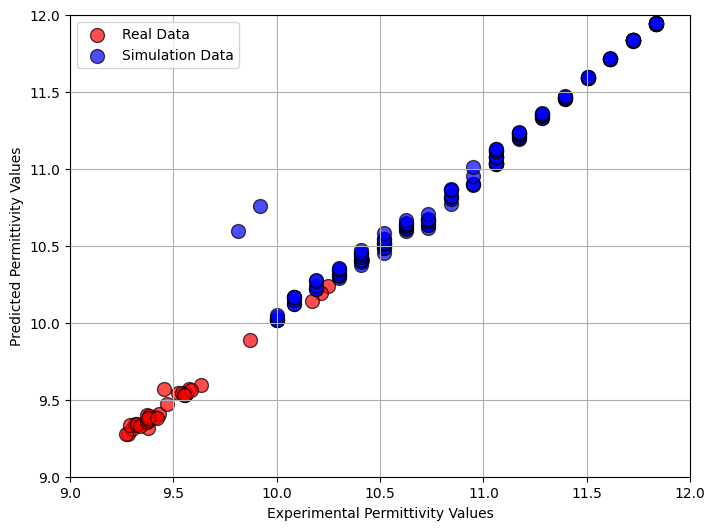

In [ ]:
# Slice the first 32 elements from y_test
y_test_subset = y_test[:208]

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size to your desired dimensions
plt.scatter(y_test_real, predictions_real, alpha=0.7, c='r', edgecolors='k', s=100, label='Real Data')
plt.scatter(filtered_data[:,1], filtered_data[:, 0], alpha=0.7, c='b', edgecolors='k', s=100, label='Simulation Data')  # Adjust marker properties as needed
plt.title('')
plt.xlabel('Experimental Permittivity Values')
plt.ylabel('Predicted Permittivity Values')
plt.grid(True)

# # Fit a first-degree (linear) polynomial
# coefficients = np.polyfit(y_test_subset, predictions_1[0], 1)
# polynomial = np.poly1d(coefficients)

# # Plot the regression line
# plt.plot(y_test_subset, polynomial(y_test_subset), color='r', linestyle='--', linewidth=2)
# Set the limits for both axes
plt.xlim(9, 12)
plt.ylim(9, 12)
plt.legend()

# Save the plot as a high-quality image (e.g., PNG or PDF)
plt.savefig('/content/drive/MyDrive/IEEE EMBS SMP Project/results/scatter_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calculate different correlation coefficients
pearson_corr, _ = pearsonr(y_test_real.flatten(), predictions_real.flatten())         # Pearson correlation coefficient
spearman_corr, _ = spearmanr(y_test_real.flatten(), predictions_real.flatten())       # Spearman rank correlation coefficient
kendall_corr, _ = kendalltau(y_test_real.flatten(), predictions_real.flatten())       # Kendall Tau correlation coefficient

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Spearman Rank Correlation Coefficient: {spearman_corr}")
print(f"Kendall Tau Correlation Coefficient: {kendall_corr}")


Pearson Correlation Coefficient: 0.9946190956767478
Spearman Rank Correlation Coefficient: 0.9527126099706745
Kendall Tau Correlation Coefficient: 0.8346774193548387


In [ ]:
# Calculate different correlation coefficients
pearson_corr, _ = pearsonr(filtered_data[:, 1], filtered_data[:, 0])         # Pearson correlation coefficient
spearman_corr, _ = spearmanr(filtered_data[:, 1], filtered_data[:, 0])       # Spearman rank correlation coefficient
kendall_corr, _ = kendalltau(filtered_data[:, 1], filtered_data[:, 0])       # Kendall Tau correlation coefficient

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Spearman Rank Correlation Coefficient: {spearman_corr}")
print(f"Kendall Tau Correlation Coefficient: {kendall_corr}")

Pearson Correlation Coefficient: 0.9271943131334863
Spearman Rank Correlation Coefficient: 0.9866253230366461
Kendall Tau Correlation Coefficient: 0.9381727622543549


In [ ]:
errors_real = np.array([[0.12017632],
       [0.00991821],
       [0.01522541],
       [0.00327682],
       [0.06067371],
       [0.02593708],
       [0.01821613],
       [0.01325226],
       [0.01405239],
       [0.0360527 ],
       [0.02934551],
       [0.02570343],
       [0.00599766],
       [0.02091503],
       [0.04698277],
       [0.02134228],
       [0.00588417],
       [0.01059437],
       [0.02807713],
       [0.00075054],
       [0.01516628],
       [0.02016068],
       [0.01123047],
       [0.00353527],
       [0.0215292 ],
       [0.02612019],
       [0.01453972],
       [0.01834869],
       [0.00449467],
       [0.0376091 ],
       [0.00459194],
       [0.03167439]])

In [ ]:
errors_simulation = np.abs(filtered_data[:, 0] - filtered_data[:, 1])

In [ ]:
error_per_simulation = np.mean(errors_simulation/filtered_data[:, 1])
error_per_simulation

0.009411014952849954

In [ ]:
error_per_real = np.mean(errors_real/y_test_real)
error_per_real

0.0023718109339161747

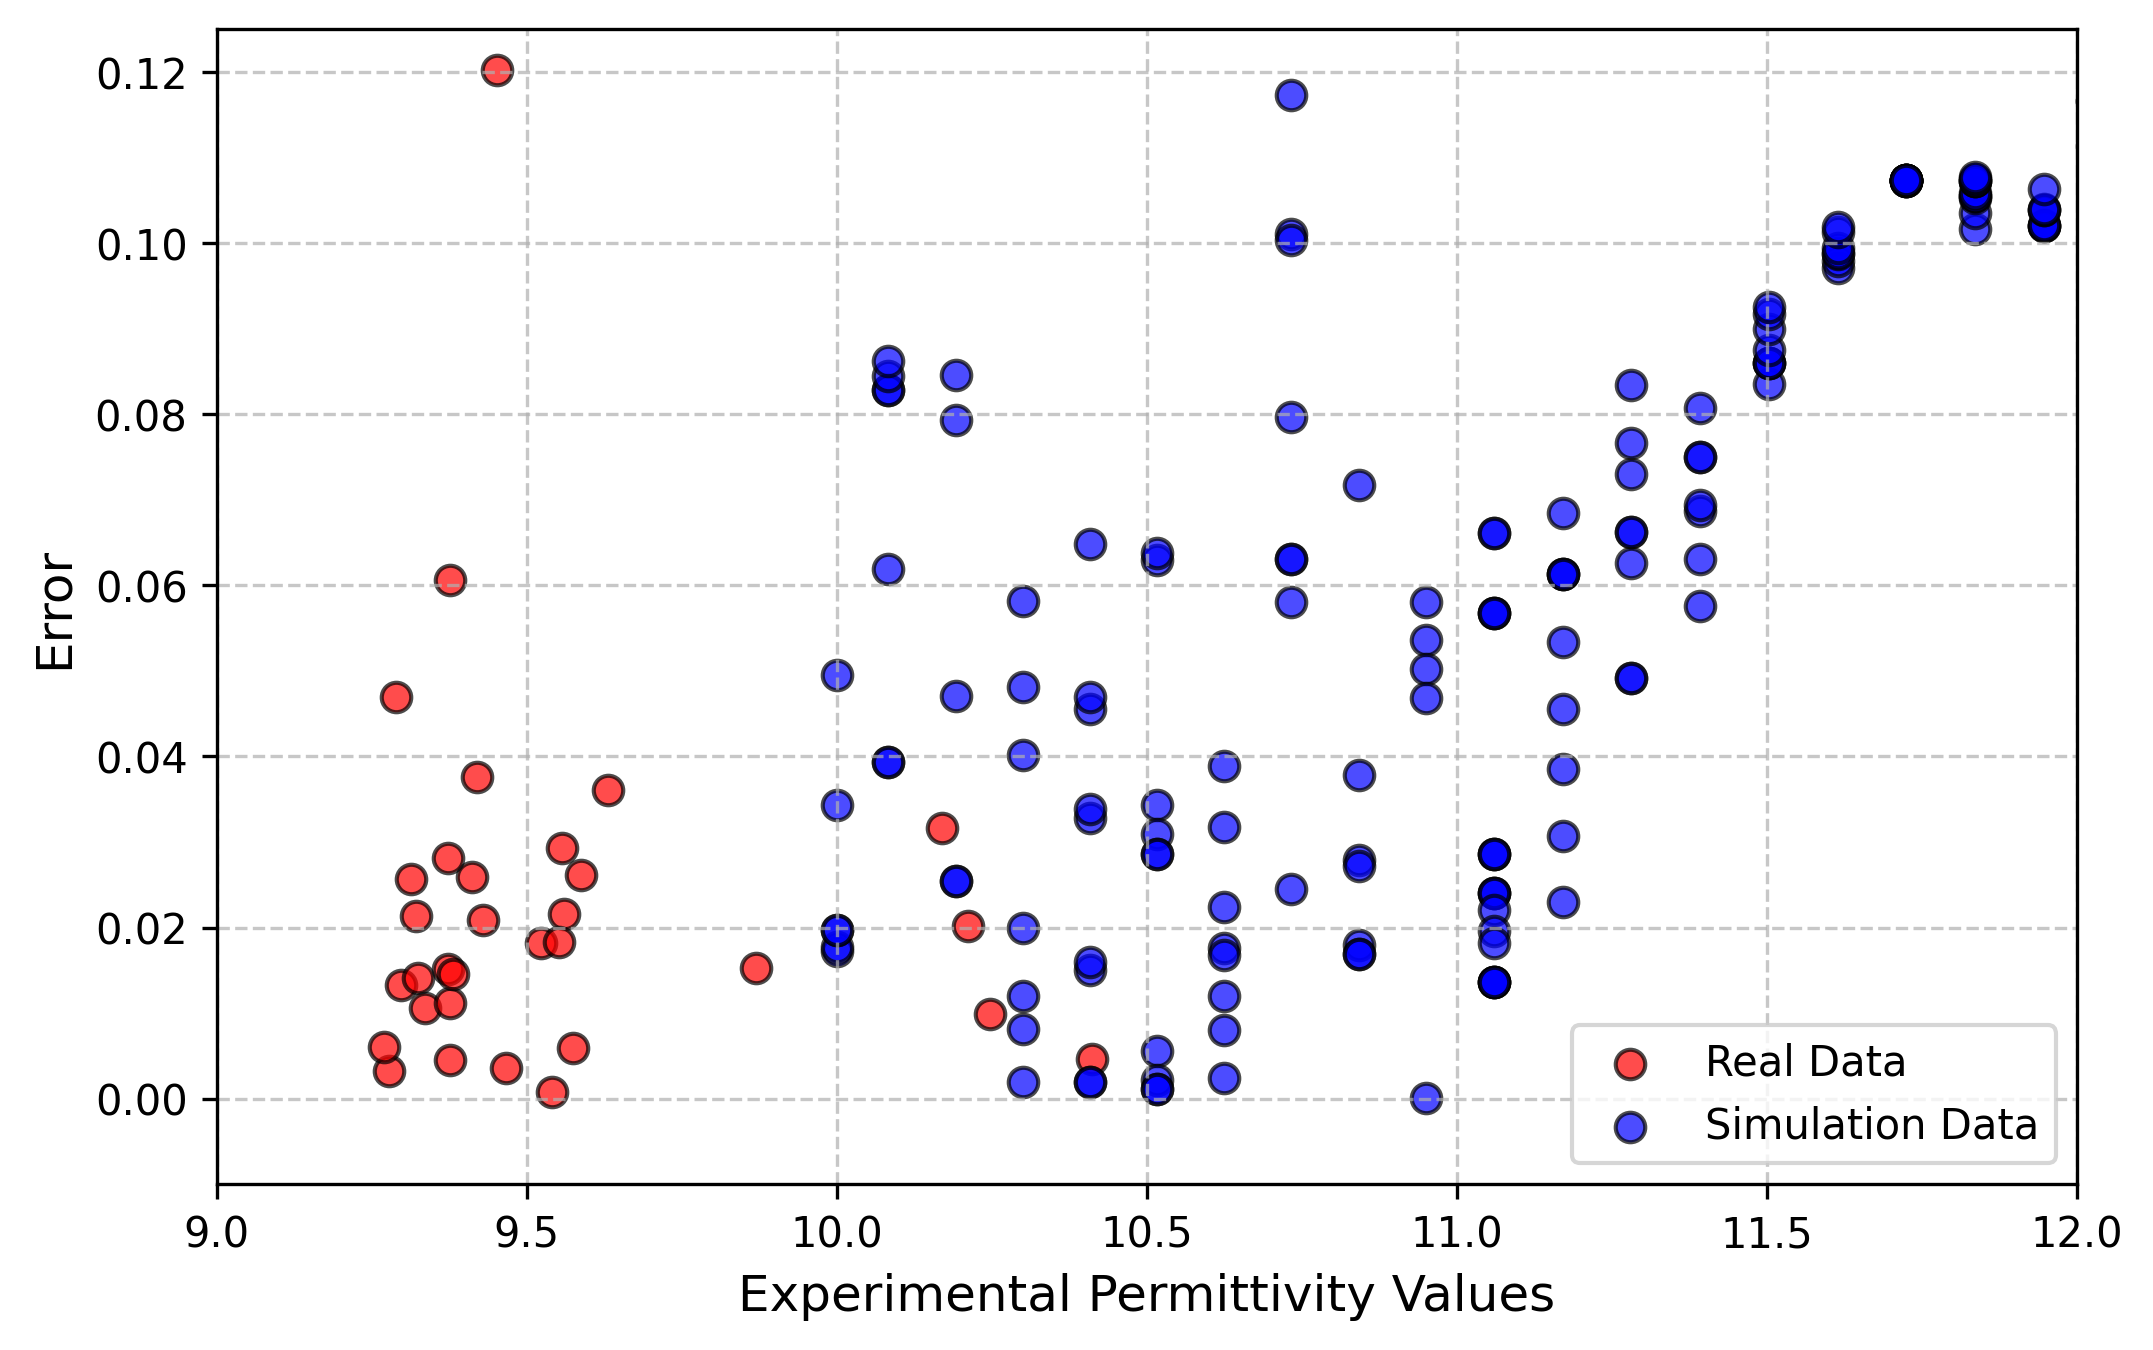

In [ ]:
plt.figure(figsize=(8, 5), dpi=300)

# Plot the data with customizations
plt.scatter(y_test_real, errors_real, alpha=0.7, c='r', edgecolors='k', s=50, label='Real Data')
plt.scatter(filtered_data[:,1], errors_simulation, alpha=0.7, c='b', edgecolors='k', s=50, label='Simulation Data')
plt.xlabel('Experimental Permittivity Values', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the axis labels and ticks (adjust as needed)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(9, 12)
plt.ylim(-0.01, 0.125)

# Save the plot as a high-resolution image (adjust the format as needed)
plt.savefig('/content/drive/MyDrive/IEEE EMBS SMP Project/results/simulation_real_error_plot.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

#Siamese

In [ ]:
from tensorflow.keras.layers import Input, Dense, Lambda, concatenate

# Define the shared layers for the Siamese network
def shared_layers(input_shape):
    input_layer = Input(shape=input_shape)
    shared_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(input_layer)
    shared_layer_2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_1)
    shared_layer_3 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_2)
    shared_layer_4 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_3)
    shared_layer_5 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_4)
    shared_layer_6 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001))(shared_layer_5)
    return Model(inputs=input_layer, outputs=shared_layer_6)

# Define the input layers for original and noisy data
input_original = Input(shape=(4,), name='original')
input_noisy = Input(shape=(4,), name='noisy')

# Create shared layers for both original and noisy data
shared_model = shared_layers((4,))

# Apply shared layers to both inputs
shared_original = shared_model(input_original)
shared_noisy = shared_model(input_noisy)

# Define the output layers for original and noisy data branches
output_original = Dense(1, name='output_original')(shared_original)
output_noisy = Dense(1, name='output_noisy')(shared_noisy)

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr

# Define custom loss function
def custom_loss_contrastive(y_true, y_pred):
    epsilon = 10e-6
    loss_2 = 1/(tf.losses.mean_squared_error(y_true, y_pred)+epsilon)

    #print('MSE_original', loss_1)
    # Combine the losses as per your requirements
    # total_loss = loss_1 + loss_2

    return loss_2

def custom_loss_contrastive_abs(y_true, y_pred):
    epsilon = 10e-6
    loss_2 = 1 / (tf.losses.mean_absolute_error(y_true, y_pred) + epsilon)

    return loss_2

# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model with custom losses
model = Model(inputs=[input_original, input_noisy], outputs=[output_original, output_noisy])
model.compile(optimizer=adam_optimizer, loss={'output_original': 'mse', 'output_noisy': custom_loss_contrastive_abs})

# Print the model summary
model.summary()

# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_Siamese.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Calculate the number of steps
num_steps = len(X_train) // batch_size
val_steps = len(X_test) // batch_size

print(val_steps)
print(batch_size)

# Train the model using your custom data loading pipeline
# You need to replace X_train and y_train with your custom data loading logic
# You can use tf.data.Dataset for custom data loading pipelines
history = model.fit(
    custom_data_loader(X_train, y_train, batch_size),  # Replace with your custom data loader
    epochs=epochs,
    batch_size=batch_size,
    steps_per_epoch=num_steps,
    validation_data=val_dataset,
    validation_steps=val_steps,
    callbacks=[checkpoint, lr_scheduler]
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 original (InputLayer)       [(None, 4)]                  0         []                            
                                                                                                  
 noisy (InputLayer)          [(None, 4)]                  0         []                            
                                                                                                  
 model (Functional)          (None, 32)                   150688    ['original[0][0]',            
                                                                     'noisy[0][0]']               
                                                                                                  
 output_original (Dense)     (None, 1)                    33        ['model[0][0]']         

In [ ]:
# len(val_dataset)

In [ ]:
model = tf.keras.models.load_model('/content/best_model_Siamese.h5', custom_objects={'custom_loss_contrastive_abs': custom_loss_contrastive_abs})

losses = model.evaluate(val_dataset, steps=val_steps)
print("Test Loss:", losses)

1/1 [==============================] - 0s 154ms/step - loss: 0.0197 - output_original_loss: 0.0050 - output_noisy_loss: 0.0087
Test Loss: [0.019691752269864082, 0.00501715112477541, 0.008660530671477318]


In [ ]:
model = tf.keras.models.load_model('/content/best_model_Siamese.h5', custom_objects={'custom_loss_contrastive_abs': custom_loss_contrastive_abs})

losses = model.evaluate(val_dataset, batch_size = 128, steps=val_steps) # steps=val_steps
print("Test Loss:", losses)

1/1 [==============================] - 0s 297ms/step - loss: 0.0189 - output_original_loss: 0.0041 - output_noisy_loss: 0.0092
Test Loss: [0.018939677625894547, 0.004071385599672794, 0.009154844097793102]


In [ ]:
predictions_1 = model.predict(val_dataset, batch_size = 128, steps=val_steps)

1/1 [==============================] - 0s 213ms/step


In [ ]:
predictions_1[0].flatten().shape

(128,)

In [ ]:
file_path = 'predictions.csv' #withStandardizing

# Save the NumPy array to a CSV file
np.savetxt(file_path, predictions_1[0].flatten(), delimiter=',', fmt='%.15f')

In [ ]:
val_dataset

<_PrefetchDataset element_spec=({'original': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'noisy': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
X_test[:,0][:20] #frequency

array([ 1.65166239,  0.93924733,  1.82976615,  0.40493604, -1.01989408,
       -0.30747902,  1.82976615,  1.47355862,  0.76114357,  0.22683227,
        0.04872851,  0.5830398 ,  0.40493604,  0.22683227,  0.5830398 ,
       -0.48558278, -0.66368655, -1.01989408, -0.48558278,  1.82976615])

In [ ]:
y_test[:20] #true values

array([10.08333333, 10.51666667, 10.        , 10.84166667, 11.72533333,
       11.2816    , 10.        , 10.19166667, 10.625     , 10.95      ,
       11.05973333, 10.73333333, 10.84166667, 10.95      , 10.73333333,
       11.39253333, 11.50346667, 11.72533333, 11.39253333, 10.        ])

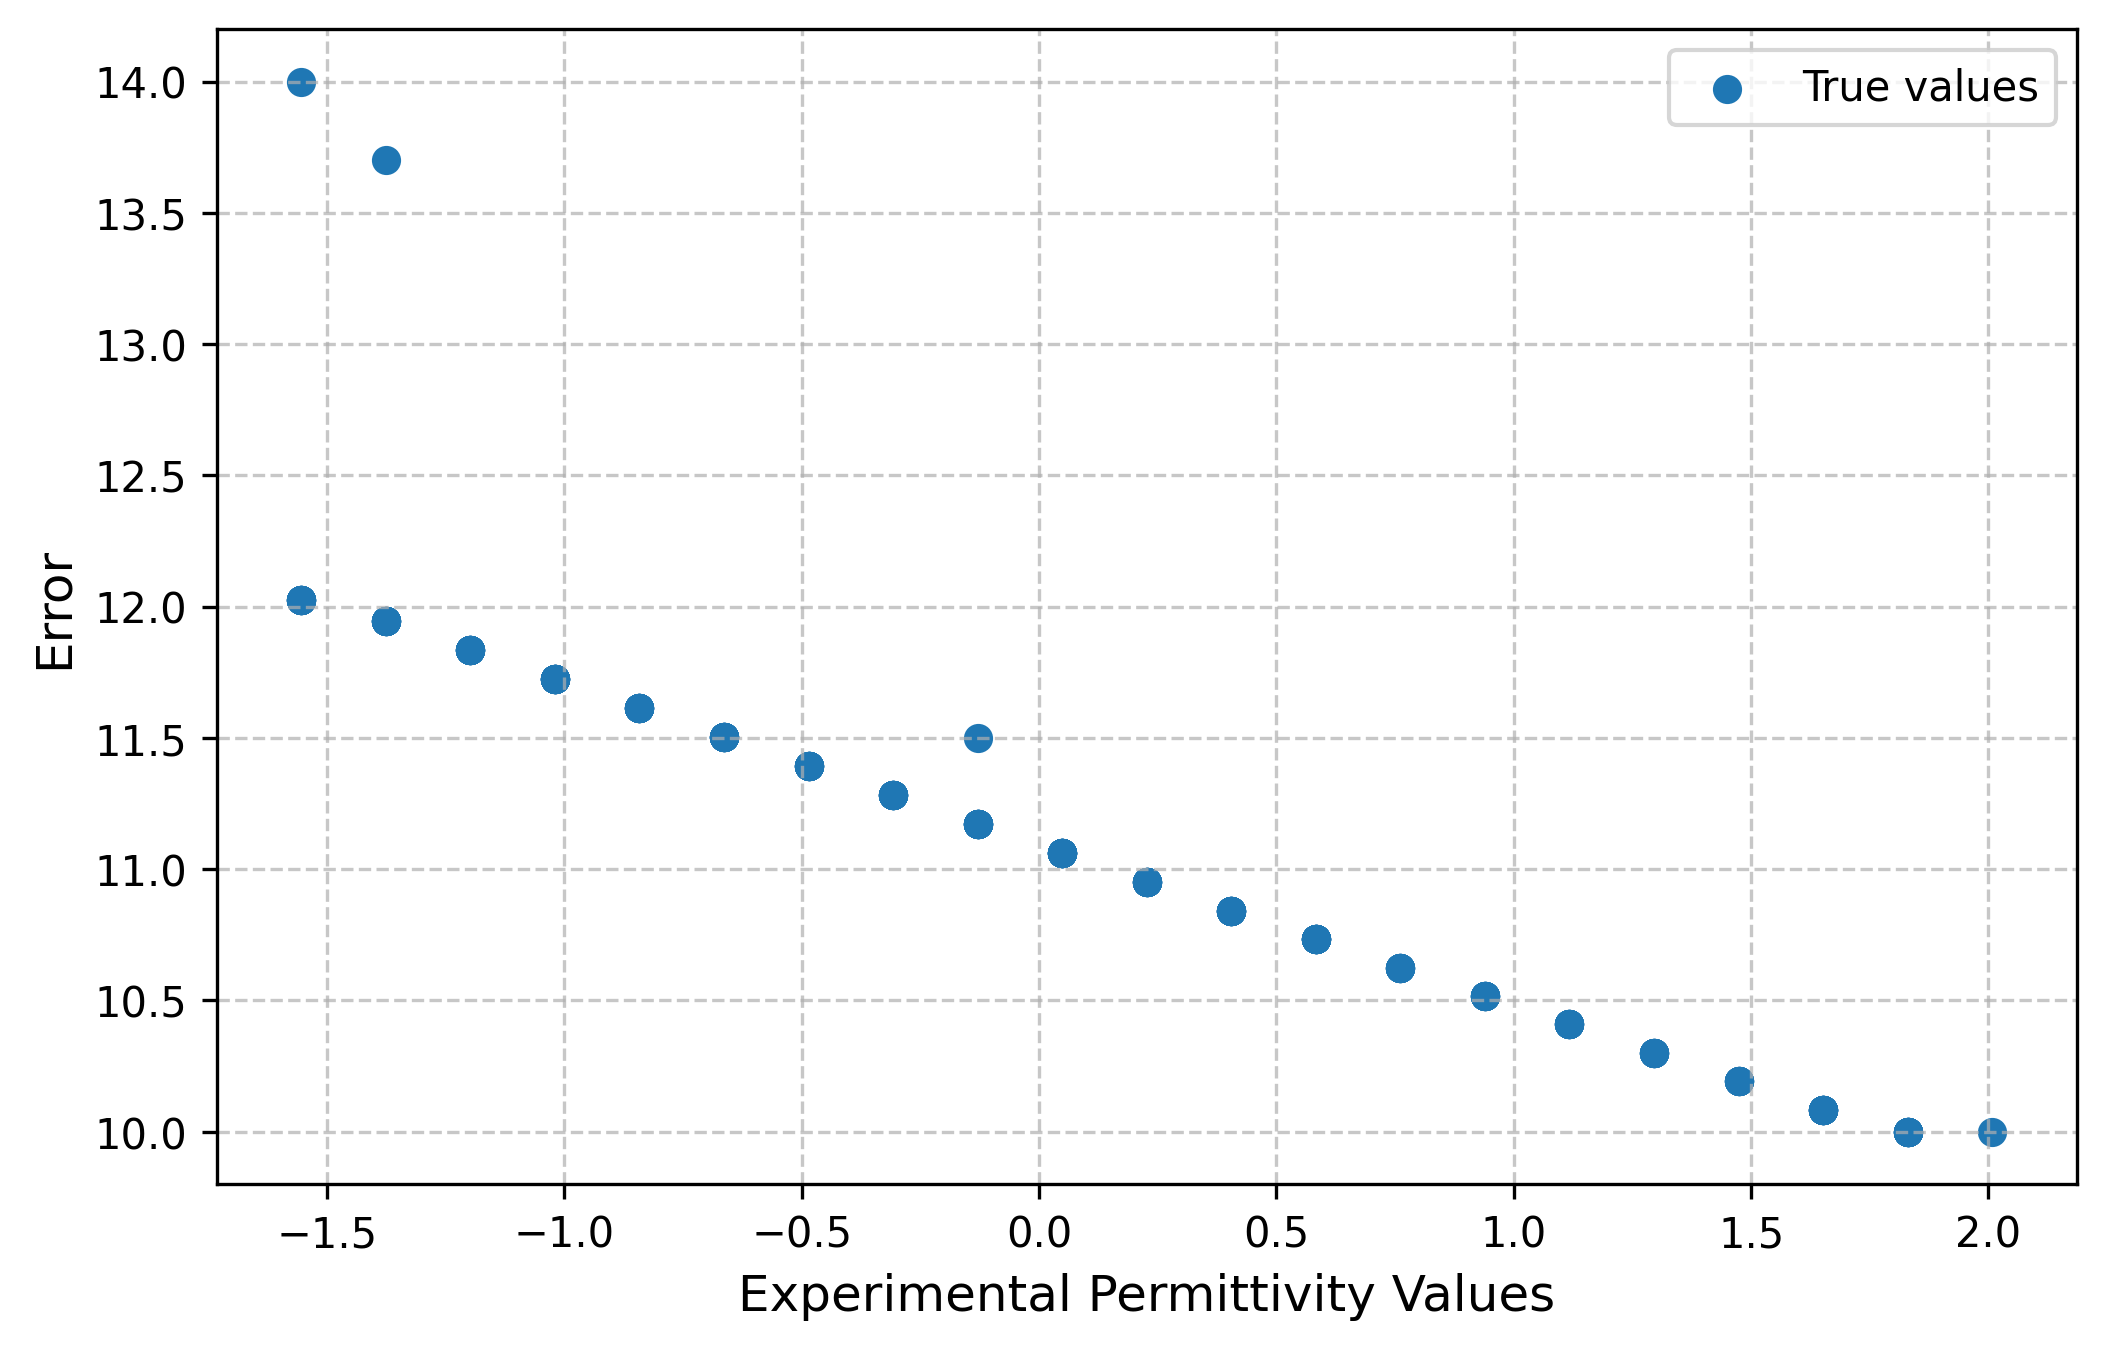

In [ ]:
# sorted_indices = np.argsort(X_test[:, 0][:256])
# sorted_X_test = X_test[:, 0][:256][sorted_indices]
# sorted_y_test = y_test[:256][sorted_indices]
# sorted_predictions = predictions_1[0].flatten()[sorted_indices]

plt.figure(figsize=(8, 5), dpi=300)

# Plot the data with customizations
plt.scatter(X_test[:, 0][:256], y_test[:256], label='True values')
# plt.scatter(X_test[:, 0][:256], predictions_1[0].flatten(), label='Predictions')
plt.xlabel('Experimental Permittivity Values', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the axis labels and ticks (adjust as needed)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.xlim(9, 12)
# plt.ylim(-0.01, 0.125)

# Save the plot as a high-resolution image (adjust the format as needed)
# plt.savefig('/content/drive/MyDrive/IEEE EMBS SMP Project/results/simulation_real_error_plot.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

# Y_test and predictions vs frequency

In [ ]:
# Load the CSV file into a pandas DataFrame
df_vsFreq = pd.read_csv('/content/drive/MyDrive/IEEE EMBS SMP Project/Data_Simulation/new_simulations/y_test.csv')

# Convert the DataFrame to a NumPy array
predictions_vsFreq = df_vsFreq.values

In [ ]:
predictions_vsFreq.shape

(127, 3)

In [ ]:
plt.figure(figsize=(8, 5), dpi=300)

# Plot the data with customizations
plt.scatter(predictions_vsFreq[:,0], predictions_vsFreq[:,1], label='True values')
plt.scatter(predictions_vsFreq[:,0], predictions_vsFreq[:,2], label='Predictions')
plt.xlabel('Frequency (GHz)', fontsize=12)
plt.ylabel('Permittivity Values', fontsize=12)
plt.title('', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the axis labels and ticks (adjust as needed)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.xlim(9, 12)
# plt.ylim(-0.01, 0.125)

# Save the plot as a high-resolution image (adjust the format as needed)
plt.savefig('/content/drive/MyDrive/IEEE EMBS SMP Project/results/vsFreq.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

For one set

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/IEEE EMBS SMP Project/Data_Simulation/new_simulations/oneFreqPoint.csv')

# Convert the DataFrame to a NumPy array
full_array = df.values

# print(full_array)

sum_array_scaled = scaler.fit_transform(full_array[:,1:5])

val_dataset = custom_data_loader(sum_array_scaled, full_array[:,5], batch_size=21, noise_stddev=1, shuffle=False)

model = tf.keras.models.load_model('/content/best_model_Siamese.h5', custom_objects={'custom_loss_contrastive_abs': custom_loss_contrastive_abs})

predictions_1 = model.predict(val_dataset, batch_size = 21, steps=1)

print(predictions_1[0])

plt.figure(figsize=(8, 5), dpi=300)

# Plot the data with customizations
plt.scatter(full_array[:,0], full_array[:,5], label='True values')
plt.scatter(full_array[:,0], predictions_1[0].flatten(), label='Predictions')
plt.xlabel('Frequency (GHz)', fontsize=12)
plt.ylabel('Permittivity Values', fontsize=12)
plt.title('', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the axis labels and ticks (adjust as needed)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.xlim(9, 12)
# plt.ylim(-0.01, 0.125)

# Save the plot as a high-resolution image (adjust the format as needed)
# plt.savefig('/content/drive/MyDrive/IEEE EMBS SMP Project/results/vsFreq.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

# SOTA comparison

ISAP/Micro-optical

In [ ]:
# Build the model
model_1 = Sequential([
    Dense(4, activation='selu', kernel_regularizer=regularizers.l2(0.00001), input_shape=(4,)),
    #Dropout(0.01),
    Dense(8, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(16, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(32, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(64, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(128, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(1)  # Single output neuron for regression
])

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr

# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model
model_1.compile(optimizer=adam_optimizer, loss='mean_squared_error')

checkpoint_1 = ModelCheckpoint('isap_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_1, lr_scheduler])

loss_1 = model_1.evaluate(X_test, y_test)
print("Test Loss:", loss_1)

predictions_1 = model_1.predict(X_test)

errors_1 = np.abs(predictions_1 - y_test)

# Load the best model
best_model = tf.keras.models.load_model('isap_model.h5')

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE) with Best Model: {test_loss}")

Epoch 1/500
1/4 [======>.......................] - ETA: 5s - loss: 25.2245
Epoch 1: val_loss improved from inf to 19.05173, saving model to isap_model.h5
4/4 [==============================] - 2s 124ms/step - loss: 24.0187 - val_loss: 19.0517 - lr: 0.0010
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 21.3917
Epoch 2: val_loss improved from 19.05173 to 14.37118, saving model to isap_model.h5
4/4 [==============================] - 0s 39ms/step - loss: 18.9024 - val_loss: 14.3712 - lr: 0.0010
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 14.9475
Epoch 3: val_loss improved from 14.37118 to 10.01736, saving model to isap_model.h5
4/4 [==============================] - 0s 68ms/step - loss: 14.3460 - val_loss: 10.0174 - lr: 0.0010
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 11.3532
Epoch 4: val_loss improved from 10.01736 to 6.56438, saving model to isap_model.h5
4/4 [==============================] - 0s 31ms/step - loss: 9.8023

Access

In [ ]:
# Build the model
model_1 = Sequential([
    Dense(4, activation='selu', kernel_regularizer=regularizers.l2(0.00001), input_shape=(4,)),
    #Dropout(0.01),
    Dense(8, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(16, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(32, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(64, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(128, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(256, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(1)  # Single output neuron for regression
])

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr

# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model
model_1.compile(optimizer=adam_optimizer, loss='mean_squared_error')

checkpoint_1 = ModelCheckpoint('access_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_1,lr_scheduler])

loss_1 = model_1.evaluate(X_test, y_test)
print("Test Loss:", loss_1)

predictions_1 = model_1.predict(X_test)

errors_1 = np.abs(predictions_1 - y_test)

# Load the best model
best_model = tf.keras.models.load_model('access_model.h5')

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE) with Best Model: {test_loss}")

Epoch 1/500
1/4 [======>.......................] - ETA: 3s - loss: 26.9493
Epoch 1: val_loss improved from inf to 14.22326, saving model to access_model.h5
4/4 [==============================] - 2s 95ms/step - loss: 24.2804 - val_loss: 14.2233 - lr: 0.0010
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 15.5423
Epoch 2: val_loss improved from 14.22326 to 5.73274, saving model to access_model.h5
4/4 [==============================] - 0s 19ms/step - loss: 12.5050 - val_loss: 5.7327 - lr: 0.0010
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 5.8948
Epoch 3: val_loss improved from 5.73274 to 2.82369, saving model to access_model.h5
4/4 [==============================] - 0s 18ms/step - loss: 4.2721 - val_loss: 2.8237 - lr: 0.0010
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 2.2030
Epoch 4: val_loss did not improve from 2.82369
4/4 [==============================] - 0s 10ms/step - loss: 3.2690 - val_loss: 4.6453 - lr: 0.0010
Epoch 

Sensors

In [ ]:
# Build the model
model_1 = Sequential([
    Dense(16, activation='selu', kernel_regularizer=regularizers.l2(0.00001), input_shape=(4,)),
    #Dropout(0.01),
    Dense(32, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(64, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(128, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(64, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(32, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(16, activation='selu', kernel_regularizer=regularizers.l2(0.00001)),
    #Dropout(0.01),
    Dense(1)  # Single output neuron for regression
])

def learning_rate_schedule(epoch, initial_lr=0.001):
    """
    Custom learning rate schedule. Adjust the learning rate based on the current epoch.
    You can customize this function to fit your needs.
    """
    if epoch < 300 or epoch == 300:
        return initial_lr  # Keep the initial learning rate for the first 50 epochs
    elif epoch > 300 and epoch%50 == 0:
        initial_lr = initial_lr * 0.1  # Reduce the learning rate by a factor of 10 after epoch 50
        return initial_lr
    else:
        return initial_lr

# Create the Adam optimizer with the initial learning rate
initial_learning_rate = 0.001
adam_optimizer = Adam(learning_rate=initial_learning_rate)

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Compile the model
model_1.compile(optimizer=adam_optimizer, loss='mean_squared_error')

checkpoint_1 = ModelCheckpoint('sensors_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[checkpoint_1, lr_scheduler])

loss_1 = model_1.evaluate(X_test, y_test)
print("Test Loss:", loss_1)

predictions_1 = model_1.predict(X_test)

errors_1 = np.abs(predictions_1 - y_test)

# Load the best model
best_model = tf.keras.models.load_model('sensors_model.h5')

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE) with Best Model: {test_loss}")

Epoch 1/500
1/4 [======>.......................] - ETA: 2s - loss: 26.0078
Epoch 1: val_loss improved from inf to 7.84104, saving model to sensors_model.h5
4/4 [==============================] - 1s 58ms/step - loss: 18.8540 - val_loss: 7.8410 - lr: 0.0010
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 8.5114
Epoch 2: val_loss improved from 7.84104 to 2.59352, saving model to sensors_model.h5
4/4 [==============================] - 0s 24ms/step - loss: 6.2141 - val_loss: 2.5935 - lr: 0.0010
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 2.0825
Epoch 3: val_loss improved from 2.59352 to 1.85022, saving model to sensors_model.h5
4/4 [==============================] - 0s 18ms/step - loss: 2.0426 - val_loss: 1.8502 - lr: 0.0010
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 1.5663
Epoch 4: val_loss did not improve from 1.85022
4/4 [==============================] - 0s 9ms/step - loss: 1.7632 - val_loss: 2.0421 - lr: 0.0010
Epoch 5/5

# Add explainability

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7d5b7281294a87a55b21361f339c8602328b6f986c434ecca99b809e1dc2ebb8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
model_1 = tf.keras.models.load_model('best_model_1.h5')

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import csv

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train, mode="regression", training_labels=y_train, feature_names=['s21_mag', 's21_phase', 's22_mag', 's22_phase'])

test_len = len(X_test)

# Create a list to store explanation details for all test instances
explanation_details_list = []

# Define the output CSV file path
output_csv_file = 'explanation_details.csv'

with open(output_csv_file, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header row with feature names
    header_row = ['Prediction','Feature', 'Weight', 'local_exp', 'intercept', 'r score']
    csv_writer.writerow(header_row)

for i in range(test_len): #test_len

    #explanation_details_list = []

    # Explain an individual prediction
    explanation = explainer.explain_instance(X_test[i], model_1.predict)

    # Retrieve the explanation details as a list of tuples
    explanation_details = explanation.as_list()

    # Append the explanation details to the list
    #explanation_details_list.append(explanation_details)

    # Print the explanation details (optional)
    print(f"Analysis Details for Prediction {i + 1}:")
    for feature, weight in explanation_details:
        # print(f"Feature: {feature}, Weight: {weight}")
        continue

    # print(explanation.local_exp)
    # print(explanation.intercept)
    # R2 score
    # print(explanation.score)

    # Visualize the explanation (optional)
    #explanation.show_in_notebook()

    # Write the explanation details to a CSV file row by row
    with open(output_csv_file, mode='a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        #csv_writer.writerow([f'Prediction {i + 1}', explanation_details])

        # Write explanation details for each test instance
        #for i, explanation_details in enumerate(explanation_details_list):

        for feature, weight in explanation_details:
             csv_writer.writerow([f'Prediction {i + 1}', feature, weight, explanation.local_exp, explanation.intercept, explanation.score])

157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 1:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 2:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 3:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 4:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 5:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 6:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 7:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 8:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 9:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 10:
157/157 [==============================] - 0s 1ms/step
Analysis Details for Prediction 11:
157/157 

SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.8 MB/s eta 0:00:00


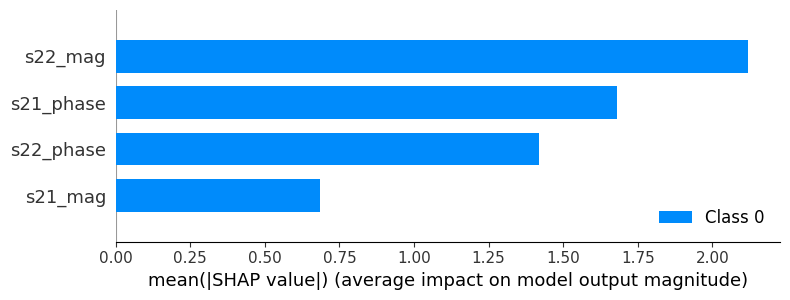

In [ ]:
import shap

# Create an explainer
explainer = shap.DeepExplainer(model_1, X_train)

# Calculate SHAP values for a single prediction
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=['s21_mag', 's21_phase', 's22_mag', 's22_phase'], plot_type="bar")